## Customer Churn Analysis

In [2]:
#Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the dataset
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Checking the shape of the dataset
df.shape

(7043, 21)

In [6]:
# checking the column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Checking for the data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#Converting TotalCharges from object to float type data
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [9]:
# Removing the unwanted columns
#Column Id is the unique number belonging to individual customer which will not be useful
#Dropping Customer Id column
df.drop(columns='customerID',inplace=True)

In [10]:
df.shape

(7043, 20)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
# Checking for the null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The dataset doesnt have ane any null values

### EDA

Male      3555
Female    3488
Name: gender, dtype: int64

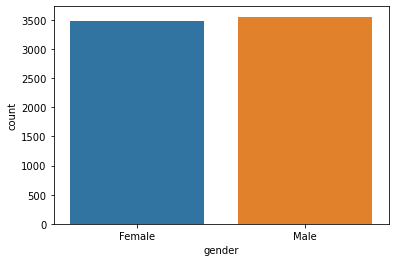

In [13]:
sns.countplot(x='gender',data=df)
df['gender'].value_counts()

We have almost equal proportions of male & female population in our dataset

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

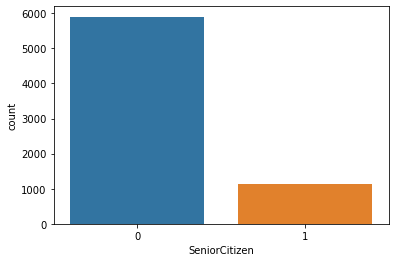

In [14]:
sns.countplot(x='SeniorCitizen',data=df)
df['SeniorCitizen'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

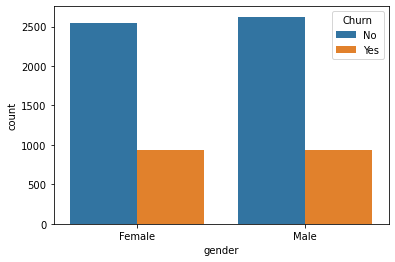

In [15]:
sns.countplot(x='gender',data=df,hue='Churn')
df['gender'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

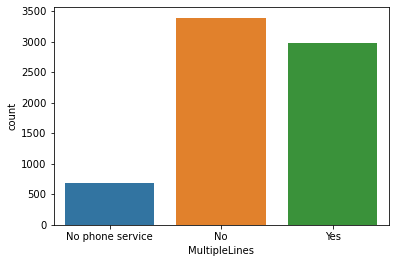

In [16]:
sns.countplot(x='MultipleLines',data=df)
df['MultipleLines'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

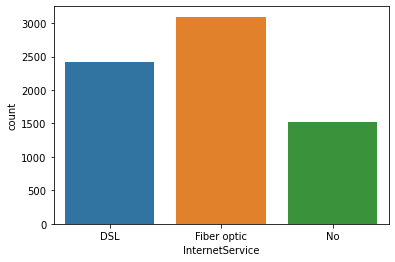

In [17]:
sns.countplot(x='InternetService',data=df)
df['InternetService'].value_counts()

In [18]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

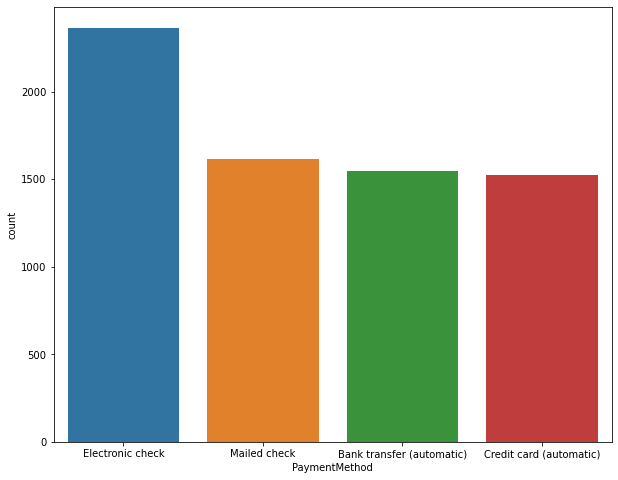

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(x='PaymentMethod',data=df)
df['PaymentMethod'].value_counts()

In [20]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

<Figure size 1440x1440 with 0 Axes>

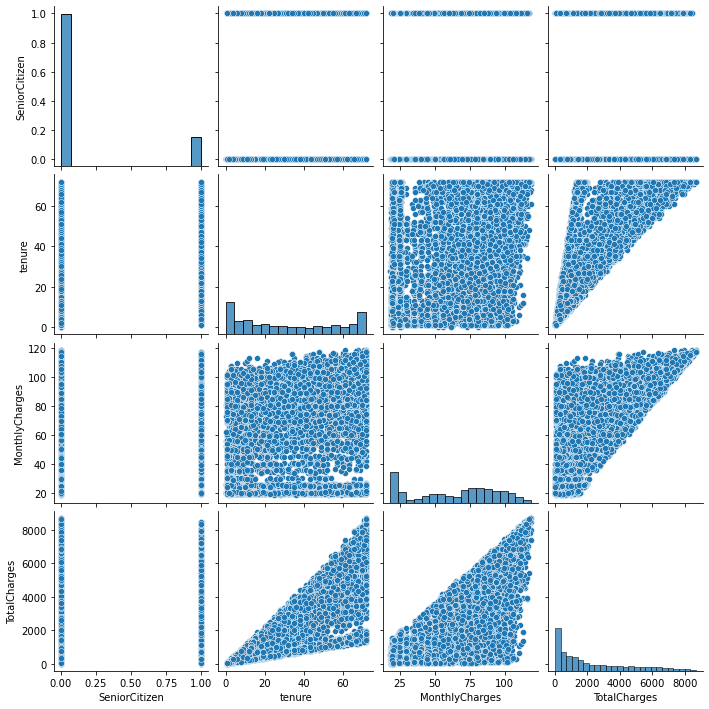

In [21]:
plt.figure(figsize=(20,20))
sns.pairplot(data=df)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

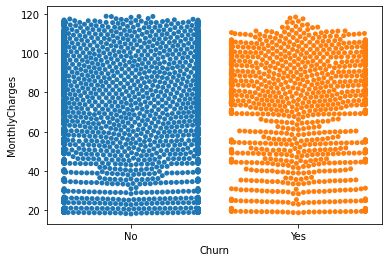

In [22]:
sns.swarmplot(x='Churn',y='MonthlyCharges',data=df)

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

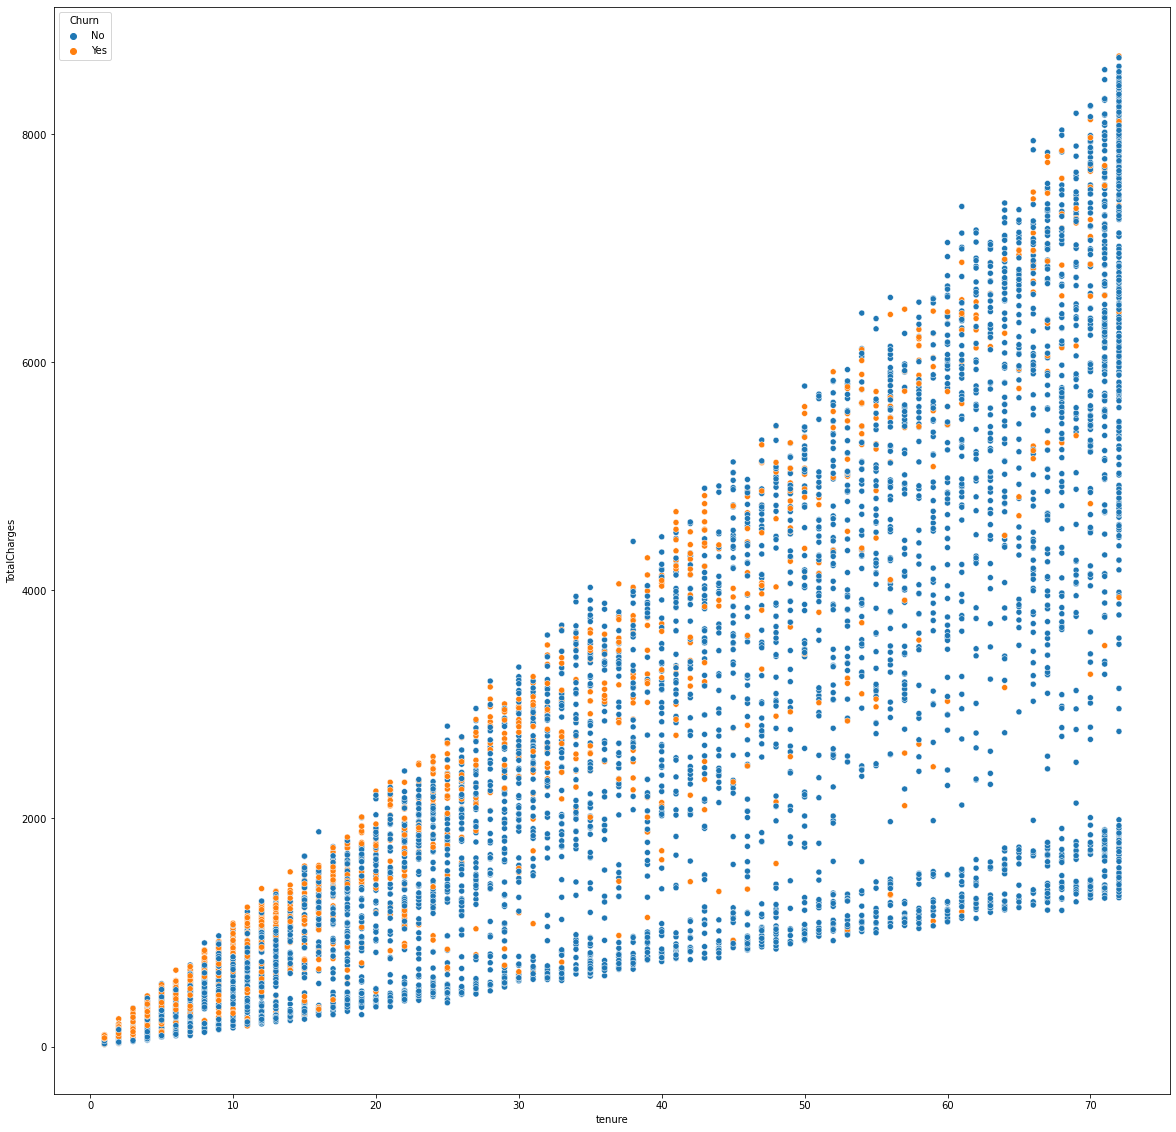

In [23]:
plt.figure(figsize=(20,20))
sns.scatterplot(y='TotalCharges',x='tenure',hue='Churn',data=df)

We can see the linear relationship between total charges and tenure

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

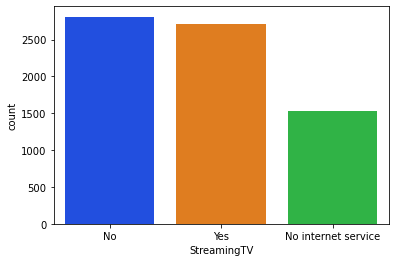

In [24]:
#StreamingTV
print(df["StreamingTV"].value_counts())
sns.countplot(df["StreamingTV"],palette="bright")

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

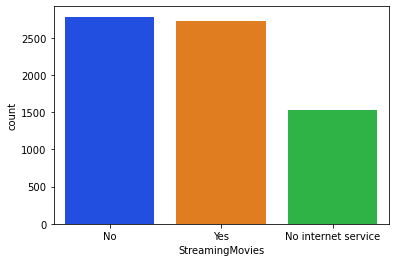

In [25]:
#StreamingMovies
print(df["StreamingMovies"].value_counts())
sns.countplot(df["StreamingMovies"],palette="bright")

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


<AxesSubplot:xlabel='Contract', ylabel='count'>

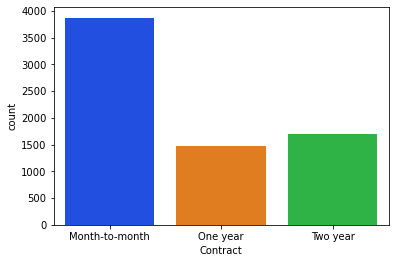

In [26]:
#Contract
print(df["Contract"].value_counts())
sns.countplot(df["Contract"],palette="bright")

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

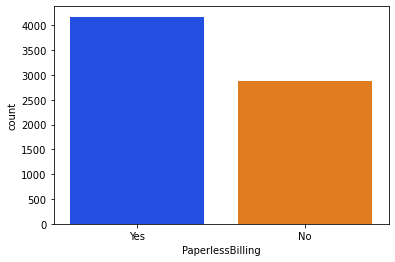

In [27]:
#Contract
print(df["PaperlessBilling"].value_counts())
sns.countplot(df["PaperlessBilling"],palette="bright")

Most of the custometr prefer paperless billing

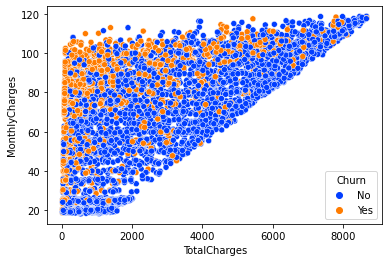

In [28]:
sns.scatterplot( x = "TotalCharges",y = "MonthlyCharges", data = df,hue="Churn",palette="bright")
plt.show()

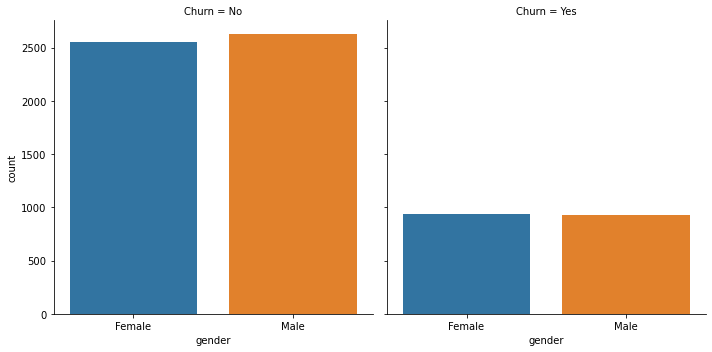

In [29]:
sns.catplot(x='gender',col='Churn',kind="count",data=df)
plt.show()

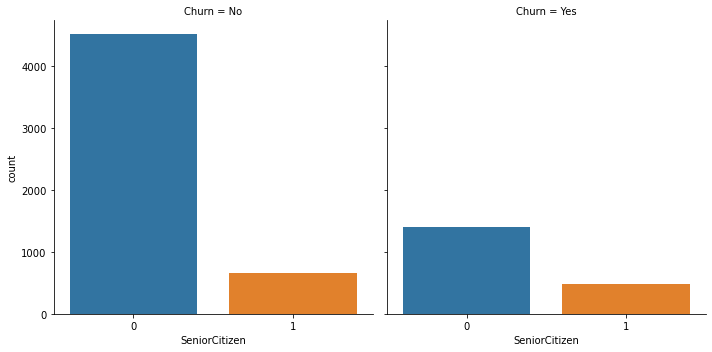

In [30]:
sns.catplot(x='SeniorCitizen',col='Churn',kind="count",data=df)
plt.show()


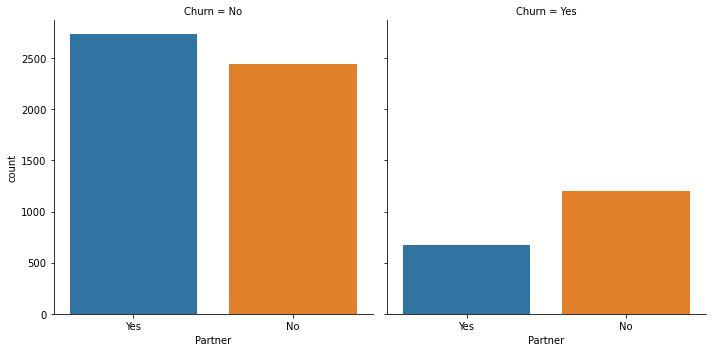

In [31]:
sns.catplot(x='Partner',col='Churn',kind="count",data=df)
plt.show()


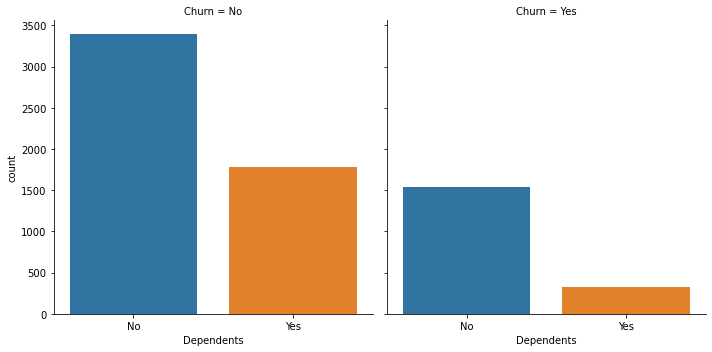

In [32]:
sns.catplot(x='Dependents',col='Churn',kind="count",data=df)
plt.show()


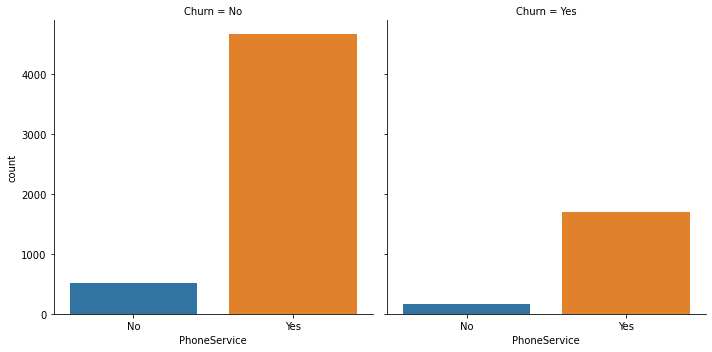

In [33]:
sns.catplot(x='PhoneService',col='Churn',kind="count",data=df)
plt.show()


In [34]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [35]:
#Importing Label encoder from sklearn library
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()
df["gender"]=le.fit_transform(df["gender"])
df["SeniorCitizen"]=le.fit_transform(df["SeniorCitizen"])
df["Partner"]=le.fit_transform(df["Partner"])
df["Dependents"]=le.fit_transform(df["Dependents"])
df["PhoneService"]=le.fit_transform(df["PhoneService"])
df["MultipleLines"]=le.fit_transform(df["MultipleLines"])
df["InternetService"]=le.fit_transform(df["InternetService"])
df["OnlineSecurity"]=le.fit_transform(df["OnlineSecurity"])
df["OnlineBackup"]=le.fit_transform(df["OnlineBackup"])
df["DeviceProtection"]=le.fit_transform(df["DeviceProtection"])
df["TechSupport"]=le.fit_transform(df["TechSupport"])
df["StreamingTV"]=le.fit_transform(df["StreamingTV"])
df["StreamingMovies"]=le.fit_transform(df["StreamingMovies"])
df["Contract"]=le.fit_transform(df["Contract"])
df["PaperlessBilling"]=le.fit_transform(df["PaperlessBilling"])
df["PaymentMethod"]=le.fit_transform(df["PaymentMethod"])

In [37]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [38]:
# Checking for the outliers
num_col=df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]

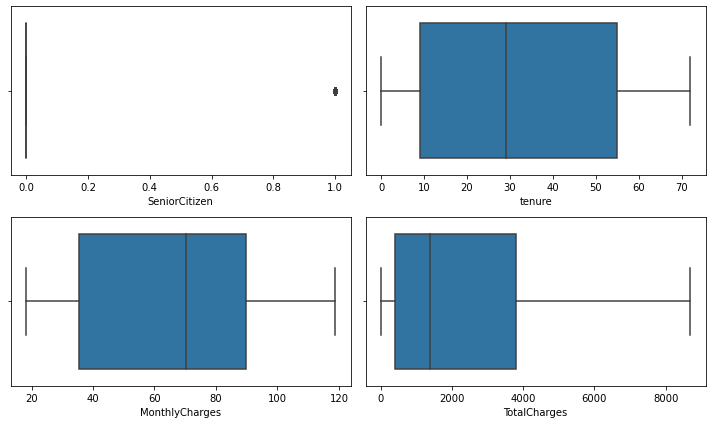

In [39]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [40]:
# Checking for skewness
df.skew().sort_values()

PhoneService       -2.727153
PaperlessBilling   -0.375396
MonthlyCharges     -0.220524
PaymentMethod      -0.170129
gender             -0.019031
StreamingMovies     0.014657
StreamingTV         0.028486
Partner             0.067922
MultipleLines       0.118719
OnlineBackup        0.182930
DeviceProtection    0.186847
InternetService     0.205423
tenure              0.239540
TechSupport         0.402365
OnlineSecurity      0.416985
Contract            0.630959
Dependents          0.875199
TotalCharges        0.961642
SeniorCitizen       1.833633
dtype: float64

In [41]:
# Removing skewness using square root method
df["TotalCharges"] = np.cbrt(df["TotalCharges"])

In [42]:
df["Churn"]=le.fit_transform(df["Churn"])

In [43]:
# Correlation

In [44]:
corr=df.corr()

In [45]:
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.002023,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106542,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343854,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.084334,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.870422,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.088243,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.462389,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.207471,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246230,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351468,-0.195525


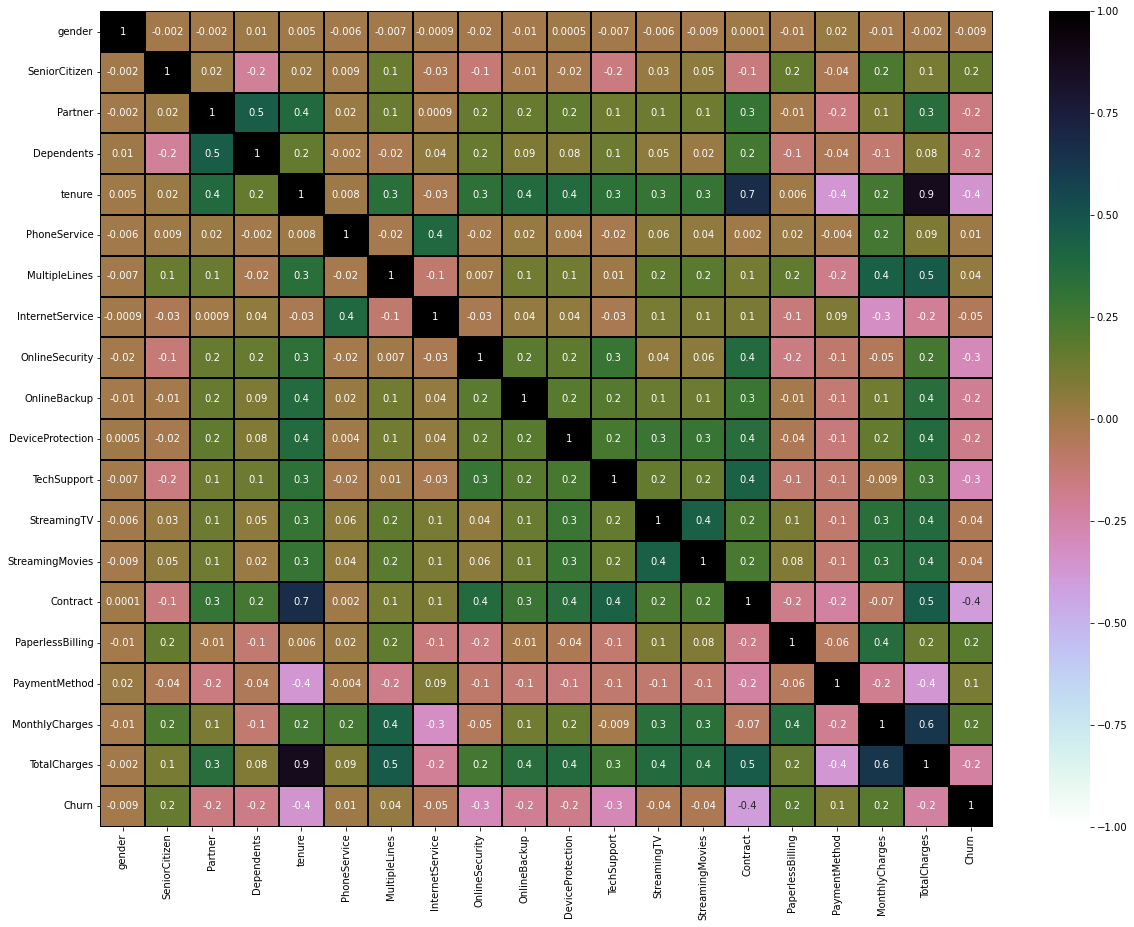

In [46]:
# Heatmap to visualize the coorelation
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="cubehelix_r")
plt.yticks(rotation=0);

In [47]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [48]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [49]:
# Vizualizing relationship between target and feature 

<AxesSubplot:>

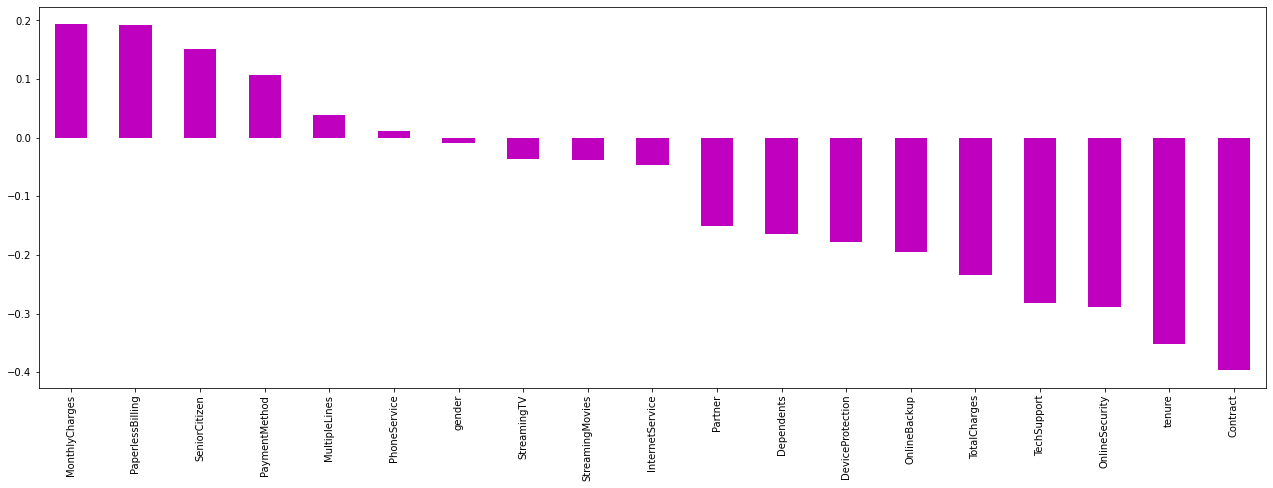

In [50]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color="m")

In [51]:
# Separatiing the feature and label
x=df.drop('Churn',axis=1)
y=df['Churn']

In [52]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,3.102045
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,12.362766
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,4.764407
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,12.255516
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,5.332704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,12.579230
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,19.454331
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,7.023391
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,6.743066


In [53]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [54]:
# Scaling the features
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.685942
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205813
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346359
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183904
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.250032
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.654459
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.884900
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942164


In [55]:
x.dtypes

gender              float64
SeniorCitizen       float64
Partner             float64
Dependents          float64
tenure              float64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [56]:
# Finding best random state

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8159015617605301  on Random_state  24


In [58]:
# Training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=maxRS)

In [59]:
x_train.shape

(5282, 19)

In [60]:
y_test.shape

(1761,)

In [61]:
#importing ml libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [62]:
# finding the best model
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predtc=dtc.predict(x_test)
cvscore=cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv=5).mean()
print(accuracy_score(y_test,predtc))
print(confusion_matrix(y_test,predtc))
print(classification_report(y_test,predtc))
print("cross val score=",(cvscore*100))

0.7365133446905168
[[1077  243]
 [ 221  220]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1320
           1       0.48      0.50      0.49       441

    accuracy                           0.74      1761
   macro avg       0.65      0.66      0.65      1761
weighted avg       0.74      0.74      0.74      1761

cross val score= 72.90783306097876


In [63]:
#SVC
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
cvscore=cross_val_score(SVC(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predsvc))
print("confusion matrix=",confusion_matrix(y_test,predsvc))
print("classification report=",classification_report(y_test,predsvc))
print("cross val score=",(cvscore*100))

accuracy score= 0.8126064735945485
confusion matrix= [[1215  105]
 [ 225  216]]
classification report=               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1320
           1       0.67      0.49      0.57       441

    accuracy                           0.81      1761
   macro avg       0.76      0.71      0.72      1761
weighted avg       0.80      0.81      0.80      1761

cross val score= 79.17458645107652


In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
cvscore=cross_val_score(RandomForestClassifier(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predrfc))
print("confusion matrix=",confusion_matrix(y_test,predrfc))
print("classification report=",classification_report(y_test,predrfc))
print("cross val score=",(cvscore*100))

accuracy score= 0.8097671777399205
confusion matrix= [[1206  114]
 [ 221  220]]
classification report=               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1320
           1       0.66      0.50      0.57       441

    accuracy                           0.81      1761
   macro avg       0.75      0.71      0.72      1761
weighted avg       0.80      0.81      0.80      1761

cross val score= 78.43646971130414


In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
cvscore=cross_val_score(GradientBoostingClassifier(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predgbc))
print("confusion matrix=",confusion_matrix(y_test,predgbc))
print("classification report=",classification_report(y_test,predgbc))
print("cross val score=",(cvscore*100))

accuracy score= 0.8171493469619534
confusion matrix= [[1207  113]
 [ 209  232]]
classification report=               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1320
           1       0.67      0.53      0.59       441

    accuracy                           0.82      1761
   macro avg       0.76      0.72      0.74      1761
weighted avg       0.81      0.82      0.81      1761

cross val score= 79.47727631088559


In [66]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict(x_test)
cvscore=cross_val_score(ExtraTreesClassifier(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predetc))
print("confusion matrix=",confusion_matrix(y_test,predetc))
print("classification report=",classification_report(y_test,predetc))
print("cross val score=",(cvscore*100))

accuracy score= 0.7921635434412265
confusion matrix= [[1179  141]
 [ 225  216]]
classification report=               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1320
           1       0.61      0.49      0.54       441

    accuracy                           0.79      1761
   macro avg       0.72      0.69      0.70      1761
weighted avg       0.78      0.79      0.78      1761

cross val score= 77.56570554169893


In [67]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
cvscore=cross_val_score(LogisticRegression(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predlr))
print("confusion matrix=",confusion_matrix(y_test,predlr))
print("classification report=",classification_report(y_test,predlr))
print("cross val score=",(cvscore*100))

accuracy score= 0.8216922203293583
confusion matrix= [[1213  107]
 [ 207  234]]
classification report=               precision    recall  f1-score   support

           0       0.85      0.92      0.89      1320
           1       0.69      0.53      0.60       441

    accuracy                           0.82      1761
   macro avg       0.77      0.72      0.74      1761
weighted avg       0.81      0.82      0.81      1761

cross val score= 80.00756142312436


In [68]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc=knc.predict(x_test)
cvscore=cross_val_score(LogisticRegression(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predknc))
print("confusion matrix=",confusion_matrix(y_test,predknc))
print("classification report=",classification_report(y_test,predknc))
print("cross val score=",(cvscore*100))

accuracy score= 0.7796706416808632
confusion matrix= [[1137  183]
 [ 205  236]]
classification report=               precision    recall  f1-score   support

           0       0.85      0.86      0.85      1320
           1       0.56      0.54      0.55       441

    accuracy                           0.78      1761
   macro avg       0.71      0.70      0.70      1761
weighted avg       0.78      0.78      0.78      1761

cross val score= 80.00756142312436


The accuracy score is 81.6 %

In [69]:
import pickle
filename= 'customer churn prediction'
pickle.dump(lr,open(filename,'wb'))